In [1]:
import pandas as pd



In [4]:
df = pd.read_csv("../data_public/checkpoint.csv", index_col="station_id")
df.head()

,tl,rf,ff,ffx,cglo,so_h,rr,rrm,tb10,tb20
station_id,,,,,,,,,,
1,99.99,99.99,99.92,99.84,99.99,100.00,99.57,99.99,8.47,0.00
2,99.94,99.78,100.00,100.00,99.93,100.00,99.82,100.00,99.92,99.94
3,99.98,99.99,99.99,99.99,99.99,100.00,99.97,99.99,100.00,99.04
4,99.97,99.97,99.85,99.86,99.99,99.99,99.67,99.97,9.45,24.29
5,99.93,99.93,99.93,99.93,0.00,100.00,98.95,99.92,0.00,0.00


In [5]:
df_filtered = df[df.min(axis=1) >= 90.0]

print(f"{len(df_filtered)} Stationen erfüllen die Bedingung.")
print(df_filtered.head())

150 Stationen erfüllen die Bedingung.
                tl      rf      ff     ffx   cglo   so_h     rr     rrm  \
station_id                                                                
2            99.94   99.78  100.00  100.00  99.93  100.0  99.82  100.00   
3            99.98   99.99   99.99   99.99  99.99  100.0  99.97   99.99   
7           100.00  100.00   99.96   99.96  99.93  100.0  98.82   99.91   
13           99.72   99.72   99.71   99.71  99.72  100.0  99.63   99.73   
18           99.94   99.99   99.99   99.99  99.99  100.0  99.88   99.99   

              tb10   tb20  
station_id                 
2            99.92  99.94  
3           100.00  99.04  
7           100.00  93.69  
13           98.75  99.11  
18           99.65  99.99  


In [6]:
top_stations = df.mean(axis=1).sort_values(ascending=False).head(20).index.tolist()
print("Top 20 Stationen:", top_stations)

Top 20 Stationen: [55, 17901, 134, 4224, 48, 20212, 19205, 16413, 112, 7604, 58, 13907, 146, 11402, 80, 10510, 70, 4305, 2503, 150]


In [14]:
df.mean(axis=1).sort_values(ascending=False).head(150)

station_id
55       100.000
17901    100.000
134       99.998
4224      99.998
48        99.996
          ...   
86        98.685
16421     98.685
51        98.147
4081      98.147
10415     98.132
Length: 150, dtype: float64

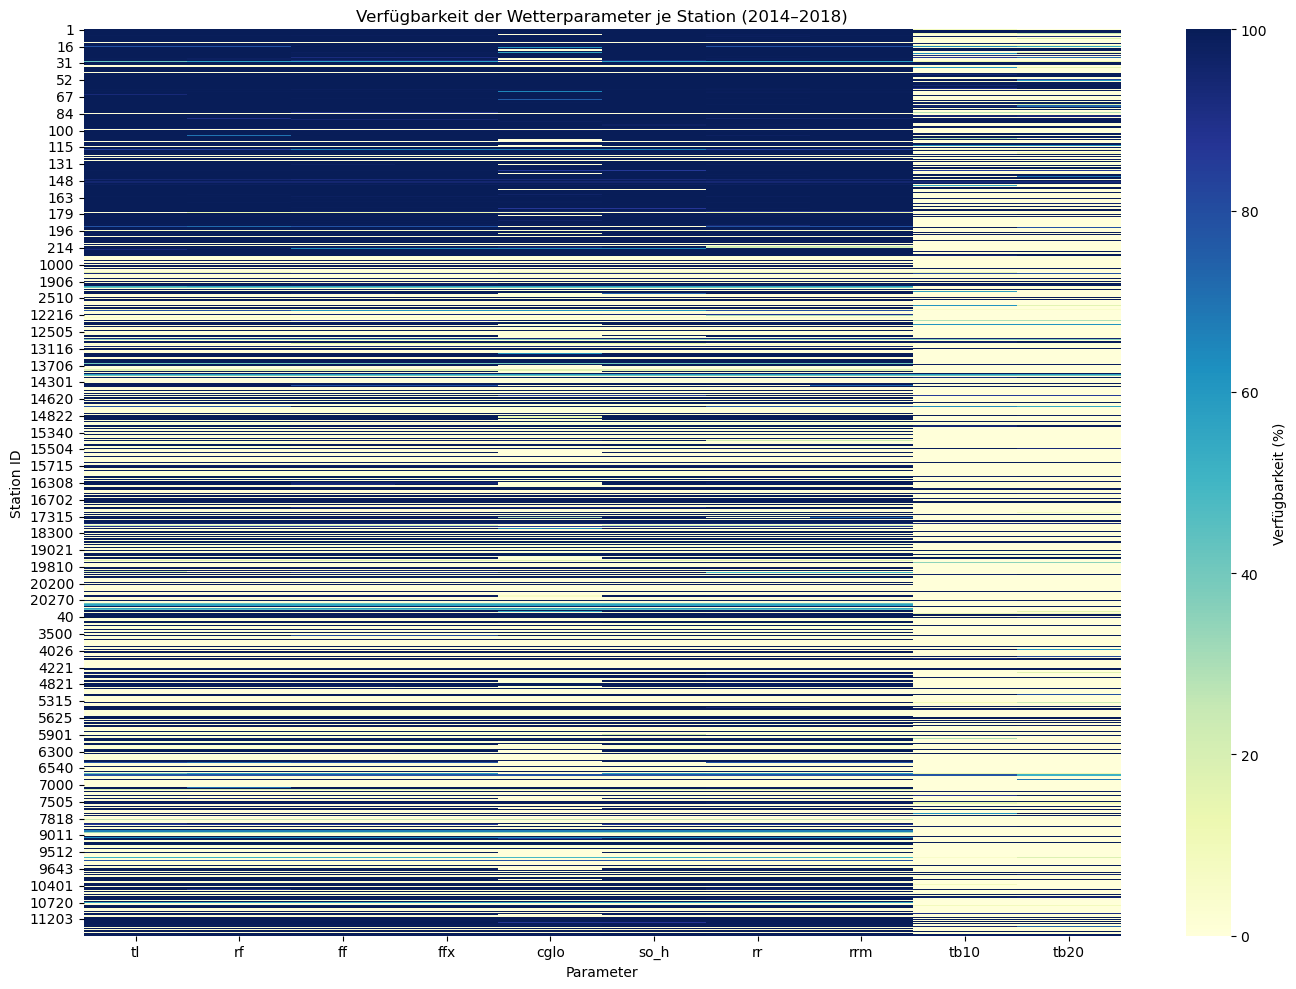

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data_public/checkpoint.csv", index_col="station_id")
plt.figure(figsize=(14, 10))
sns.heatmap(df, cmap="YlGnBu", annot=False, vmin=0, vmax=100, cbar_kws={'label': 'Verfügbarkeit (%)'})
plt.title("Verfügbarkeit der Wetterparameter je Station (2014–2018)")
plt.xlabel("Parameter")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()

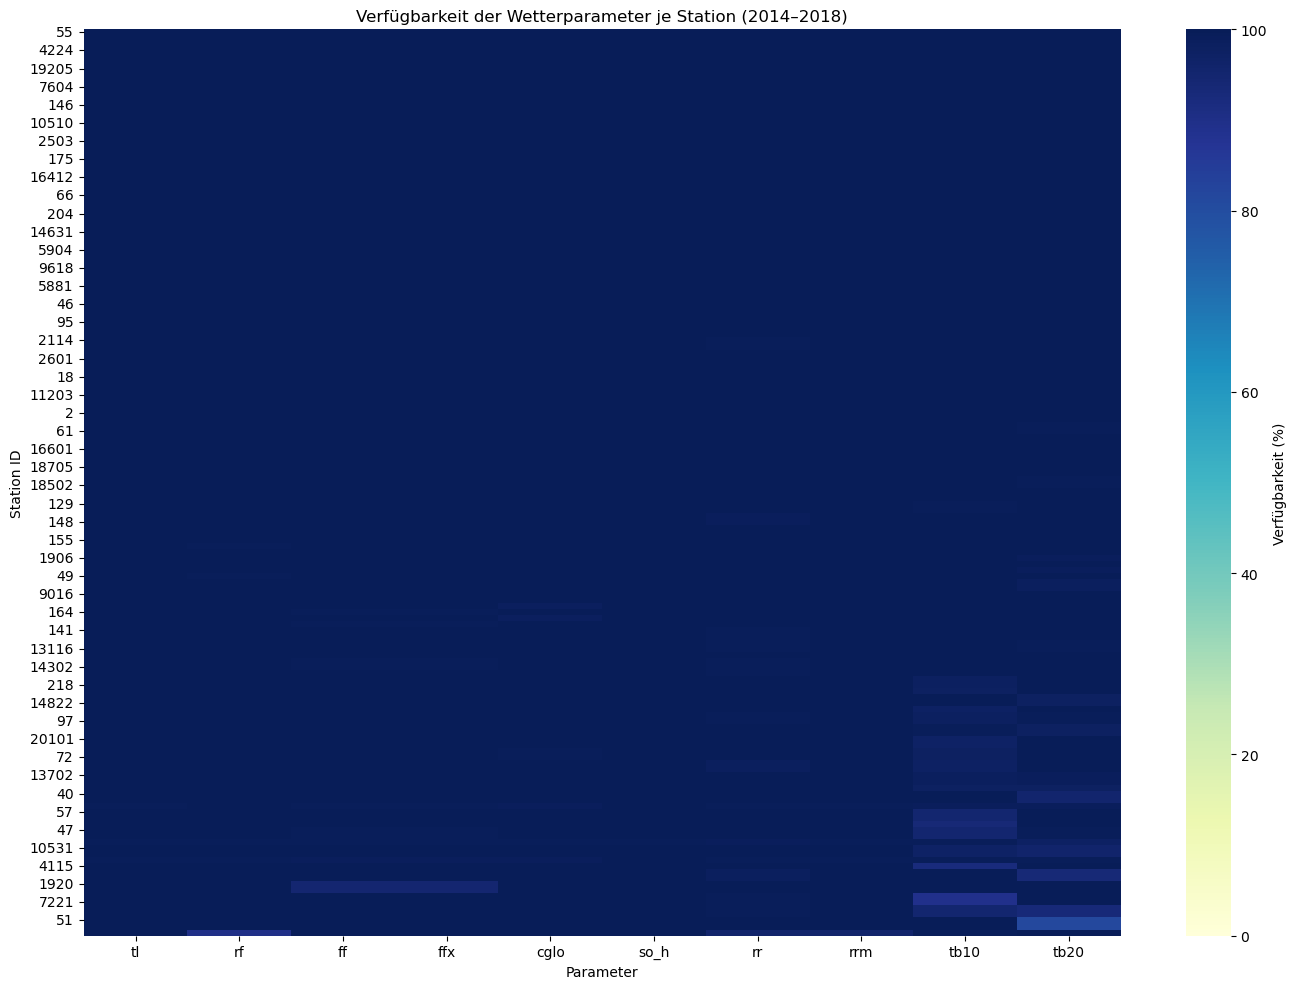

In [18]:
top_stations = df.mean(axis=1).sort_values(ascending=False).head(150).index.tolist()
df_filtered = df.loc[top_stations]
plt.figure(figsize=(14, 10))
sns.heatmap(df_filtered, cmap="YlGnBu", annot=False, vmin=0, vmax=100, cbar_kws={'label': 'Verfügbarkeit (%)'})
plt.title("Verfügbarkeit der Wetterparameter je Station (2014–2018)")
plt.xlabel("Parameter")
plt.ylabel("Station ID")
plt.tight_layout()
plt.show()

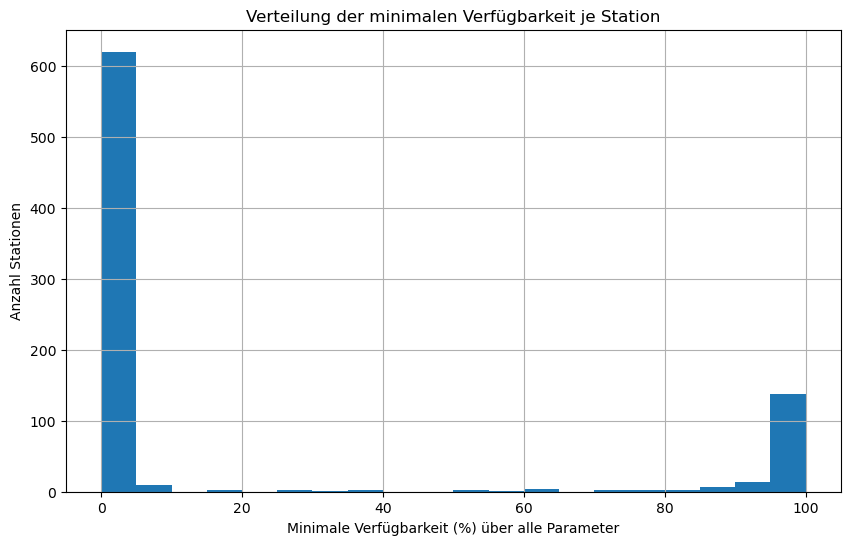

In [20]:
df["min_abdeckung"] = df.min(axis=1)
df["min_abdeckung"].hist(bins=20, figsize=(10, 6))
plt.title("Verteilung der minimalen Verfügbarkeit je Station")
plt.xlabel("Minimale Verfügbarkeit (%) über alle Parameter")
plt.ylabel("Anzahl Stationen")
plt.grid(True)
plt.show()

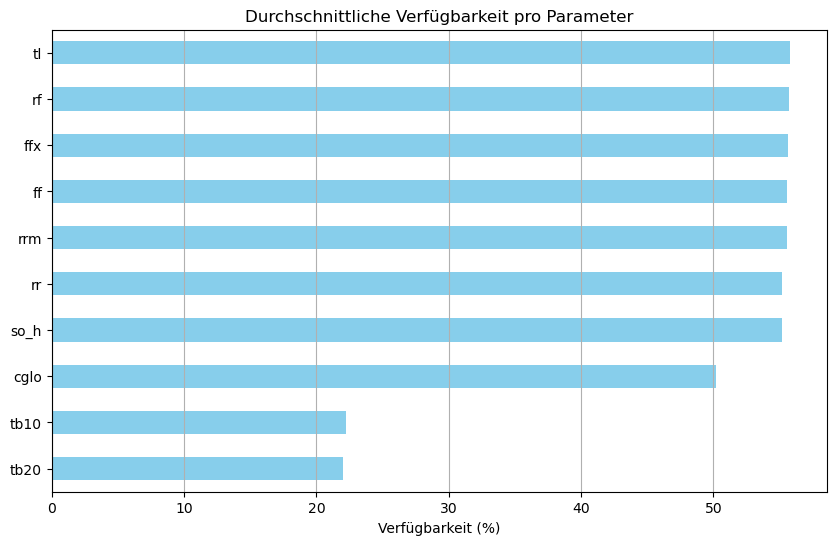

In [21]:
mean_per_param = df.drop(columns="min_abdeckung", errors="ignore").mean().sort_values()
mean_per_param.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title("Durchschnittliche Verfügbarkeit pro Parameter")
plt.xlabel("Verfügbarkeit (%)")
plt.grid(axis="x")
plt.show()

In [22]:
mean_per_param

tb20    21.994222
tb10    22.230111
cglo    50.233852
so_h    55.166173
rr      55.208074
rrm     55.532012
ff      55.596296
ffx     55.618753
rf      55.714617
tl      55.789815
dtype: float64

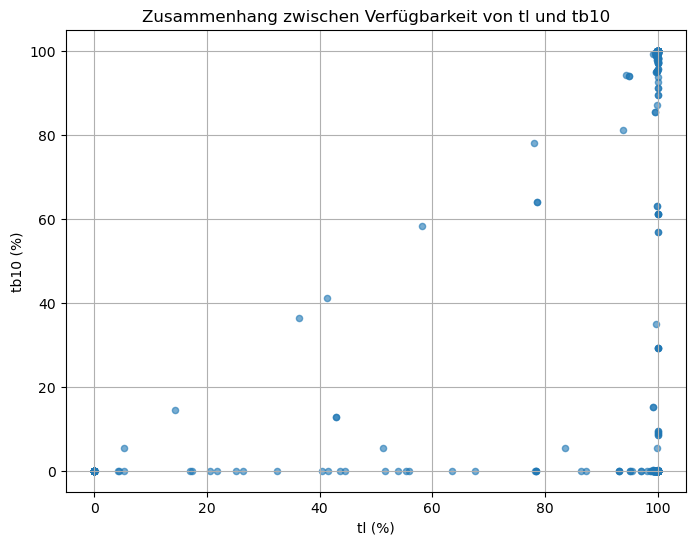

In [23]:
df.plot.scatter(x="tl", y="tb10", alpha=0.6, figsize=(8, 6))
plt.title("Zusammenhang zwischen Verfügbarkeit von tl und tb10")
plt.xlabel("tl (%)")
plt.ylabel("tb10 (%)")
plt.grid(True)
plt.show()

In [25]:
df_filtered.index.to_list()

[2,
 3,
 7,
 13,
 18,
 24,
 30,
 31,
 32,
 46,
 47,
 48,
 49,
 54,
 55,
 56,
 57,
 58,
 61,
 66,
 70,
 72,
 73,
 77,
 80,
 86,
 89,
 90,
 91,
 92,
 95,
 97,
 103,
 105,
 106,
 112,
 115,
 119,
 122,
 124,
 127,
 129,
 132,
 134,
 136,
 141,
 142,
 145,
 146,
 148,
 149,
 150,
 154,
 155,
 158,
 164,
 169,
 172,
 175,
 179,
 181,
 197,
 199,
 204,
 218,
 222,
 500,
 1415,
 1802,
 1906,
 1920,
 2114,
 2207,
 2503,
 2601,
 12615,
 12711,
 13116,
 13702,
 13907,
 14115,
 14302,
 14311,
 14631,
 14822,
 15002,
 15105,
 15501,
 15702,
 15912,
 16101,
 16412,
 16413,
 16421,
 16601,
 16800,
 17301,
 17901,
 18111,
 18225,
 18502,
 18622,
 18705,
 19021,
 19205,
 20101,
 20212,
 20270,
 20412,
 37,
 40,
 3202,
 3805,
 4115,
 4125,
 4224,
 4305,
 4705,
 5012,
 5412,
 5421,
 5625,
 5701,
 5735,
 5805,
 5881,
 5904,
 5972,
 6102,
 6305,
 7110,
 7505,
 7604,
 7641,
 7710,
 7955,
 9016,
 9211,
 9618,
 9801,
 9811,
 10510,
 10531,
 11115,
 11135,
 11203,
 11305,
 11402,
 11804,
 19911]

In [26]:
df_filtered.to_csv("../data_public/beste_stationen.csv")

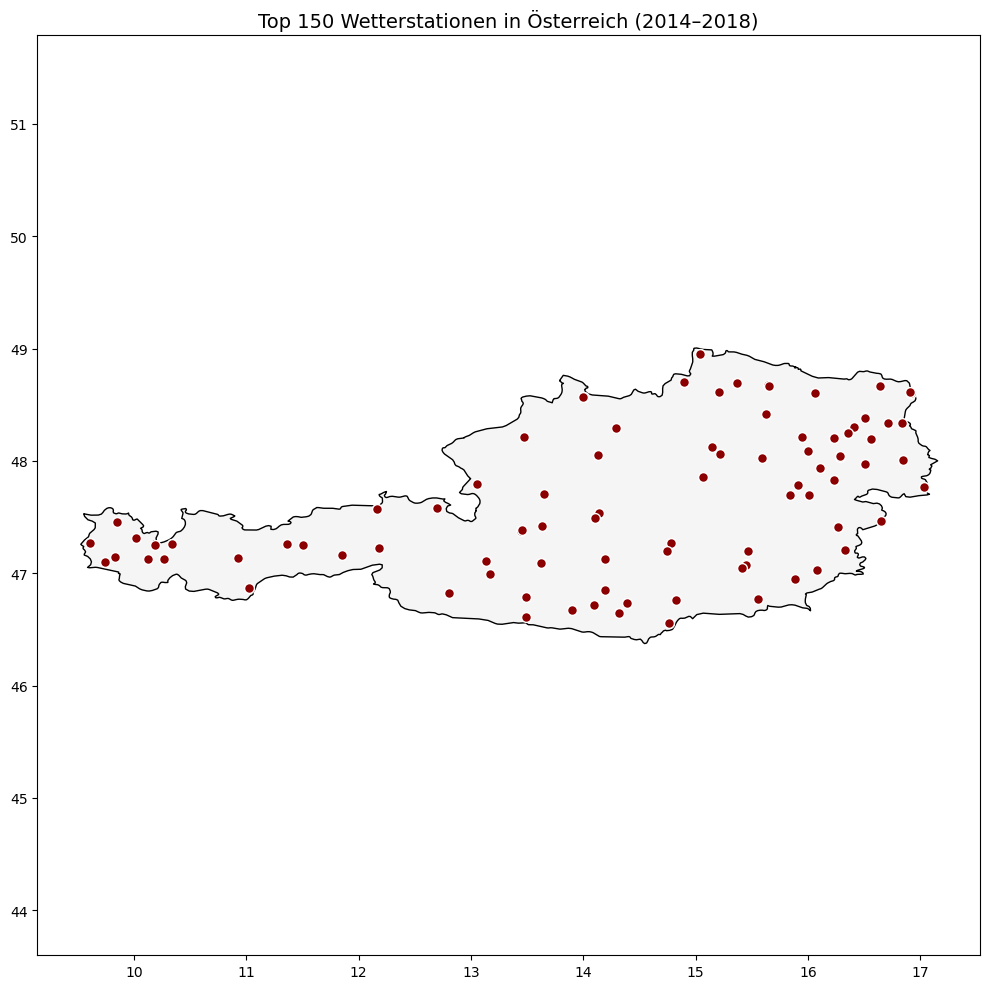

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
from shapely.geometry import Point

# 1. Lade Metadaten zu den Stationen
meta_url = "https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-1h/metadata"
response = requests.get(meta_url)
stations_meta = pd.DataFrame(response.json()["stations"])

# 2. Filter auf die Top 150 Stationen
top_150_ids = df_filtered.index.tolist()
stations_top = stations_meta[stations_meta["id"].isin(top_150_ids)].copy()

# 3. Erzeuge GeoDataFrame mit Koordinaten
stations_top["geometry"] = stations_top.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf = gpd.GeoDataFrame(stations_top, geometry="geometry", crs="EPSG:4326")

# 4. Lade Österreich-Polygon aus GeoJSON
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(countries_url)
austria = world[world['name'] == 'Austria'].to_crs(gdf.crs)

# 5. Plot
fig, ax = plt.subplots(figsize=(10, 10))
austria.plot(ax=ax, color="whitesmoke", edgecolor="black")
gdf.plot(ax=ax, color="darkred", markersize=50, edgecolor="white")
ax.set_title("Top 150 Wetterstationen in Österreich (2014–2018)", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()
